## Lets Grow More (VIP)
## Name: Vishwatej Harer
## Task N0: 1
## Task Level: Intermediate
## Task Name: Iris Flower Data Classification
## Dataset link: http://archive.ics.uci.edu/ml/datasets/Iris


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading Data

In [2]:
irisdf = pd.read_csv("Iris.csv")

In [3]:
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#stats about isris dataset
irisdf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Understanding the Data

In [5]:
irisdf.shape

(150, 6)

In [6]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking the number of rows that belongs to each class

In [7]:
irisdf['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Data Visualization

Plotting multiple pairwise bivariate distributions in a dataset using pairplot:

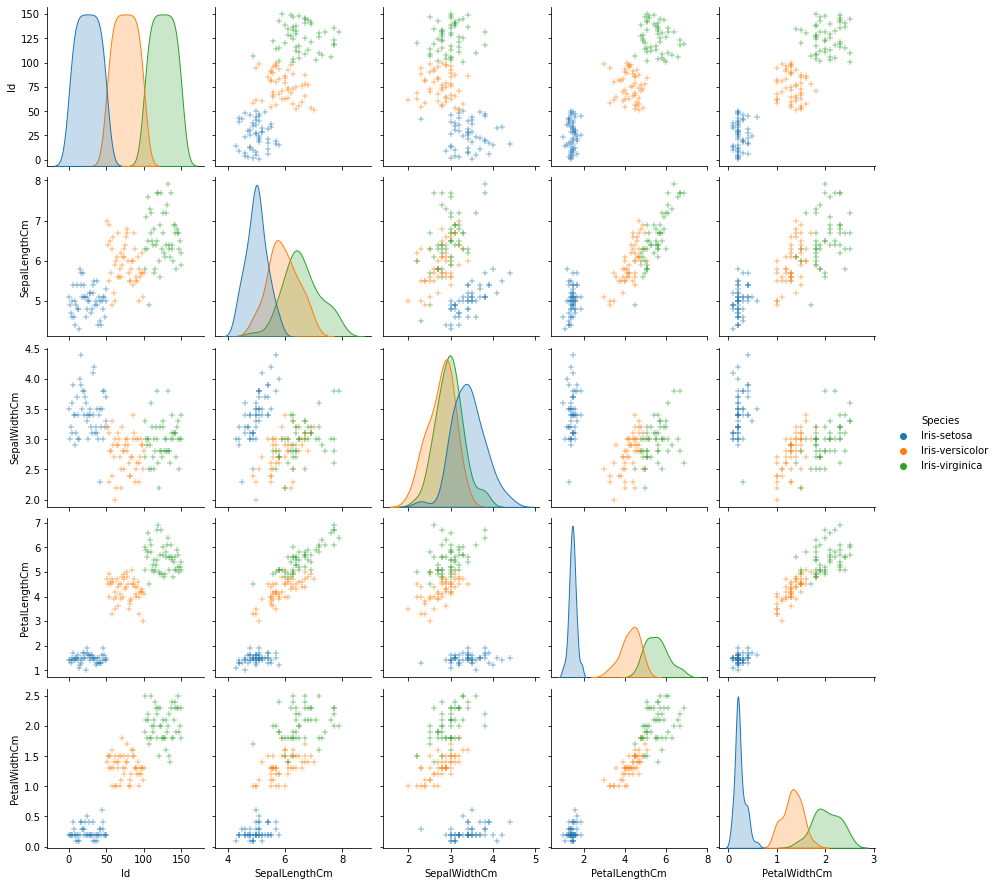

In [8]:
sns.pairplot(irisdf, hue='Species', markers='+')
plt.show()

It shows that Iris-Setosa is separated from both other species in all the features.

Plotting the heatmap to check the correlation. dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

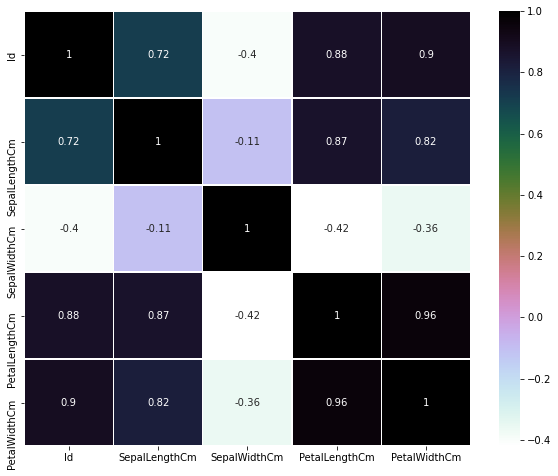

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(irisdf.corr(), annot=True, cmap='cubehelix_r', linewidths=0.4)
plt.show()

### Model Building

Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = irisdf.drop(['Species'], axis=1)
y = irisdf['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 5) | y shape: (150,) 


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.33)

## Model1 KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction and Performance Metric

In [15]:
knn_predict = knn_model.predict(X_test)

In [16]:
# testing with arandom value
print(knn_model.predict([[143,5.8,2.7,5.1,1.9]]))

['Iris-virginica']


### Predict method of the knn object

In [17]:
print(f"""
KNN Accuracy: {accuracy_score(y_test, knn_predict)}
""")


KNN Accuracy: 1.0



In [18]:
print(f"""
KNN Confusion Matrix: 
{confusion_matrix(y_test, knn_predict)},
""")


KNN Confusion Matrix: 
[[17  0  0]
 [ 0 17  0]
 [ 0  0 16]],



In [19]:
print(f"""
KNN Classification Report: 
{classification_report(y_test, knn_predict)},
""")


KNN Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50
,



## Model 2 SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model=SVC(kernel = 'linear', random_state = 0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
svm_predict=svm_model.predict(X_test)

In [23]:
print(f"""
SVM Accuracy: {accuracy_score(y_test, svm_predict)}
""")


SVM Accuracy: 1.0

